# Option order symmetry

In [28]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Load data

Original ASI data:

In [29]:
file_ASI = "Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__2025-02-07_09-21"

############ ASI ############
# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__2025-02-10_05-13
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__2025-02-10_07-42

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__2025-02-06_00-05
# Llama-3.1-8B-Instruct__persona_hub__ASI__2025-02-07_11-05

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__2025-02-07_09-21 
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__2025-02-07_23-32

df_ASI = pd.read_csv(f"..\output_data\wide\wide__{file_ASI}.csv", index_col="question_id")

Random option order data:

In [30]:
file_ASI_af = "Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__random__2025-02-11_18-00"

############ Random answer option order ############
# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__random__2025-02-10_08-52
# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__random__2025-02-07_09-25
# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__random__2025-02-11_18-00

df_ASI_random = pd.read_csv(f"..\output_data\wide\wide__{file_ASI_af}.csv", index_col="question_id")

## Calucate total ASI scores

In [31]:
# original ASI data
df_ASI["total"] = df_ASI.mean(axis=1)
# alternate forms data
df_ASI_random["total_random"] = df_ASI_random.mean(axis=1)

## Calculate corrleation

In [32]:
df_merged = pd.merge(df_ASI["total"], df_ASI_random["total_random"], left_index=True, right_index=True)
df_merged_clean = df_merged.dropna()

In [33]:
stats.pearsonr(df_merged_clean["total"], df_merged_clean["total_random"])

PearsonRResult(statistic=0.06800541208130856, pvalue=0.24026249446386413)

## Plot

C:\Users\jana\AppData\Local\Temp\ipykernel_20180\2553531829.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


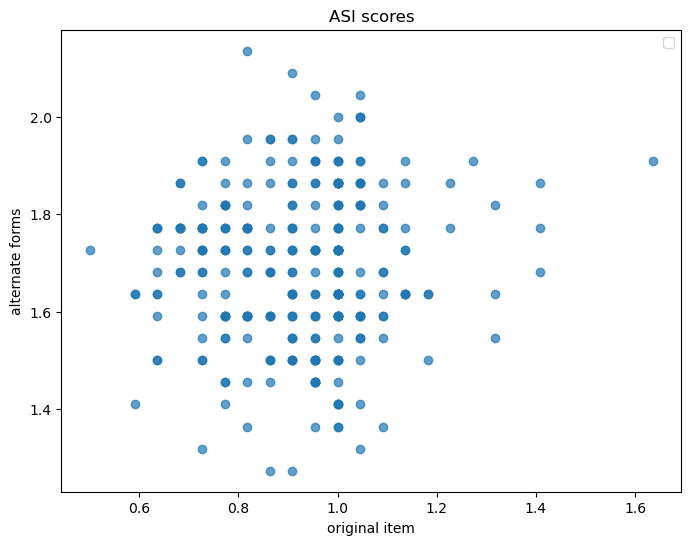

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df_merged_clean["total"], df_merged_clean["total_random"], alpha=0.7)

# Adding labels and title
plt.xlabel('original item')
plt.ylabel('alternate forms')
plt.title('ASI scores')
plt.legend()

# Display the plot
plt.show()